<a href="https://colab.research.google.com/github/UthraCG/Diabetes-Prediction-using-ML/blob/main/Diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is dataset is the set of people who have diabetes or not.

It has a attributes like gender                 
 1   age : Age of the person    

 2   hypertension : If a person have high BP its YES otherwise its      NO.

 3   heart_disease   : If a person have a heart diseases its YES otherwise its NO.   

 4   smoking_history  : It gives the details of whether the person current smoker or before smoker or not smoker etc.

 5   bmi      : Its Body Mass Index of the person            

 6   HbA1c_level  : Its Random Sugar Level varies from 0 to 10.        

 7   blood_glucose_level   : Blood Sugar level

 8   diabetes : By all this information its the prediction of whether they have diabetics or not(target variable)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
path='/content/diabetes_prediction_dataset.csv'
df=pd.read_csv(path)

#Observation of Data

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.head().T

0        1      2        3        4
gender               Female   Female   Male   Female     Male
age                    80.0     54.0   28.0     36.0     76.0
hypertension              0        0      0        0        1
heart_disease             1        0      0        0        1
smoking_history       never  No Info  never  current  current
bmi                   25.19    27.32  27.32    23.45    20.14
HbA1c_level             6.6      6.6    5.7      5.0      4.8
blood_glucose_level     140       80    158      155      155
diabetes                  0        0      0        0        0

In [ ]:
df.head().T

0      1       2       3       4
gender                 0.00   0.00    1.00    0.00    1.00
age                   80.00  54.00   28.00   36.00   76.00
hypertension           0.00   0.00    0.00    0.00    1.00
heart_disease          1.00   0.00    0.00    0.00    1.00
smoking_history        4.00   0.00    4.00    1.00    1.00
bmi                   25.19  27.32   27.32   23.45   20.14
HbA1c_level            6.60   6.60    5.70    5.00    4.80
blood_glucose_level  140.00  80.00  158.00  155.00  155.00
diabetes               0.00   0.00    0.00    0.00    0.00

In [ ]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [ ]:
df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

#Handling values

In [ ]:
df.duplicated().sum()  #check for duplicates

3854

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isna().sum()    # no need for null handling

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#Data Visualization

In [ ]:
fig1=px.pie(df,names='gender',title='Gender Distribution')
fig1.show()

In [ ]:
fig2=px.histogram(df,x='HbA1c_level',title='Diabetes Distribution',color='diabetes')
fig2.show()

In [ ]:
fig3=px.scatter(df,x='blood_glucose_level',y='bmi',color='diabetes',title='Smoking History')
fig3.show()

In [ ]:
fig4=px.sunburst(df,path=['smoking_history','diabetes'],title='Smoking History')
fig4.show()

In [ ]:
fig5=px.sunburst(df,path=['gender','diabetes'],title='Gender Distribution')
fig5.show()

In [ ]:
fig6=px.histogram(df,x='age',y='bmi',color='diabetes',title='Age Distribution')
fig6.show()

In [ ]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [ ]:
(8482/87664)*100

9.675579485307537

9.68% of people in the dataset have people who is diabetic.

#Exploratory Data Analyssis

In [ ]:
df_cate=df.select_dtypes(include='object')
df_cate

gender smoking_history
0      Female           never
1      Female         No Info
2        Male           never
3      Female         current
4        Male         current
...       ...             ...
99994  Female         No Info
99996  Female         No Info
99997    Male          former
99998  Female           never
99999  Female         current

[96146 rows x 2 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cate:
  df[i]=le.fit_transform(df[i])
  print(i)


gender
smoking_history


In [ ]:
df

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99994          4.8                  145         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[96146 rows x 9 columns]

In [ ]:
df.corr()

gender       age  hypertension  heart_disease  \
gender               1.000000 -0.028968      0.014007       0.078312   
age                 -0.028968  1.000000      0.257305       0.238451   
hypertension         0.014007  0.257305      1.000000       0.119982   
heart_disease        0.078312  0.238451      0.119982       1.000000   
smoking_history     -0.079239  0.241128      0.087892       0.023608   
bmi                 -0.023461  0.344797      0.148111       0.061376   
HbA1c_level          0.019836  0.106719      0.081441       0.068140   
blood_glucose_level  0.017830  0.114317      0.084834       0.070832   
diabetes             0.037613  0.264927      0.195710       0.170711   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.079239 -0.023461     0.019836   
age                         0.241128  0.344797     0.106719   
hypertension                0.087892  0.148111     0.081441   
heart_disease               0.023608  0.061376     0.068140   
smoking_history             1.000000  0.183840     0.035518   
bmi                         0.183840  1.000000     0.084423   
HbA1c_level                 0.035518  0.084423     1.000000   
blood_glucose_level         0.038259  0.092543     0.171615   
diabetes                    0.088471  0.214932     0.406408   

                     blood_glucose_level  diabetes  
gender                          0.017830  0.037613  
age                             0.114317  0.264927  
hypertension                    0.084834  0.195710  
heart_disease                   0.070832  0.170711  
smoking_history                 0.038259  0.088471  
bmi                             0.092543  0.214932  
HbA1c_level                     0.171615  0.406408  
blood_glucose_level             1.000000  0.424336  
diabetes                        0.424336  1.000000

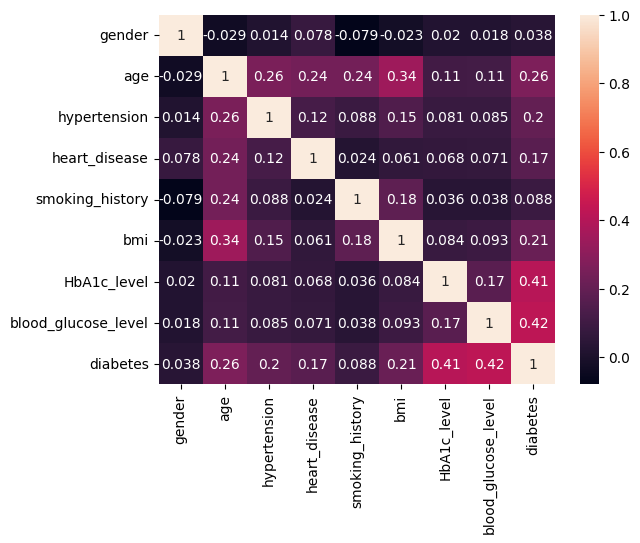

In [ ]:
heat_map=sns.heatmap(df.corr(),annot=True)

The dataset is supervised dataset with the dependent variable **diabetes**.

The Diabetes Variable is dependent on Blood Sugar level, Random Sugar Level and Age.

The dependent variable is the discrete variable. so we are going for Machine Learning **Classifiers**.

In [ ]:
fig7=px.scatter_matrix(df,color='diabetes',title='Scatter Matrix')
fig7.show()

#lazy predict


In [ ]:
! pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clas = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clas.fit(X_train, X_test, y_train, y_test)

 21%|██        | 6/29 [00:01<00:04,  5.04it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 41%|████▏     | 12/29 [00:31<01:50,  6.48s/it]

#Train split

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#Undersampling the Dataset to get best accuracy

In [ ]:
ds=df[df['diabetes']==0].sample(n=40000)
df.drop(df[df['diabetes']==0].index,inplace=True)
df1=pd.concat([df,ds])

In [ ]:
df1['diabetes'].value_counts()

diabetes
0    40000
1     8482
Name: count, dtype: int64

In [ ]:
df.shape

(48482, 9)

In [ ]:
X = df1.drop('diabetes', axis=1)
y = df1['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)

Accuracy: 0.9431129078833381
Precision: 0.9131871432862722
Recall: 0.7360774818401937
F1 score: 0.8151226705992761


Comparing the undersampled and normal dataset. undersampled dataset have less accuracy.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)
'''
Naive Bayes Classifier:
Accuracy: 0.9048134126554894
Precision: 0.46875
Recall: 0.6636536631779257
F1 score: 0.549428909019299'''

Accuracy: 0.9048134126554894
Precision: 0.46875
Recall: 0.6636536631779257
F1 score: 0.549428909019299


'\nNaive Bayes Classifier:\nAccuracy: 0.9048134126554894\nPrecision: 0.46875\nRecall: 0.6636536631779257\nF1 score: 0.549428909019299'

In [ ]:
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)

#naives bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

#Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
predictions = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)

Accuracy: 0.9479541530588896
Precision: 0.6859375
Recall: 0.7372840690978887
F1 score: 0.7106845513413506


#random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)

Accuracy: 0.9699623489276725
Precision: 0.9498018494055482
Recall: 0.6900191938579654
F1 score: 0.7993329627570873


In [ ]:
df.shape

(96146, 9)

# Gradient Booster

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)

Accuracy: 0.9713352609572942
Precision: 0.979381443298969
Recall: 0.6837811900191939
F1 score: 0.8053122350946594


#XG Booster

In [ ]:
! pip install xgboost==1.7.5

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)

Accuracy: 0.9699623489276725
Precision: 0.9373795761078998
Recall: 0.7003358925143954
F1 score: 0.8017028288931612


#confusion matrix and report

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions)
print(cm)
print(classification_report(y_test, predictions))

[[43753   152]
 [ 1292  2876]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     43905
           1       0.95      0.69      0.80      4168

    accuracy                           0.97     48073
   macro avg       0.96      0.84      0.89     48073
weighted avg       0.97      0.97      0.97     48073



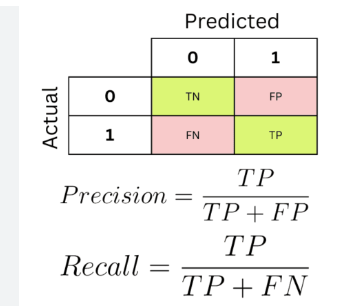

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
fig_roc=px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')).update_layout(showlegend=False)
fig_roc.show()

#Predictive Model for Random Forest

In [ ]:
y_pred = rf.predict([[float(input('Enter the gender if female 0 and male 1:',)),
                      float(input('Enter the Age:',)),
                      float(input('Enter 1 if you have BP and 0 if not:',)),
                      float(input('Enter 1 if youo have heart diseases and 0 if not:',)),
                      float(input('Smoking history no info 0, current 1, ever 2, former 3, never 4:')),
                      float(input('Enter the BMI:',)),
                      float(input('Enter the Random Sugar Level(0-10):',)),
                      float(input('Enter the Blood Sugar level:',))]])
print('************************************************************')
if y_pred[0]==0:
  print('You DONT HAVE diabetes')
else:
  print('You HAVE diabetes')
print('************************************************************')

Enter the gender if female 0 and male 1:1
Enter the Age:32
Enter 1 if you have BP and 0 if not:0
Enter 1 if youo have heart diseases and 0 if not:1
Smoking history no info 0, current 1, ever 2, former 3, never 4:1
Enter the BMI:24
Enter the Random Sugar Level(0-10):5
Enter the Blood Sugar level:160
************************************************************
You DONT HAVE diabetes
************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
